In [1]:
from tensorflow.keras.models import load_model  # Thêm dòng này
model = load_model('my_model.h5')

c:\Users\ketoan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


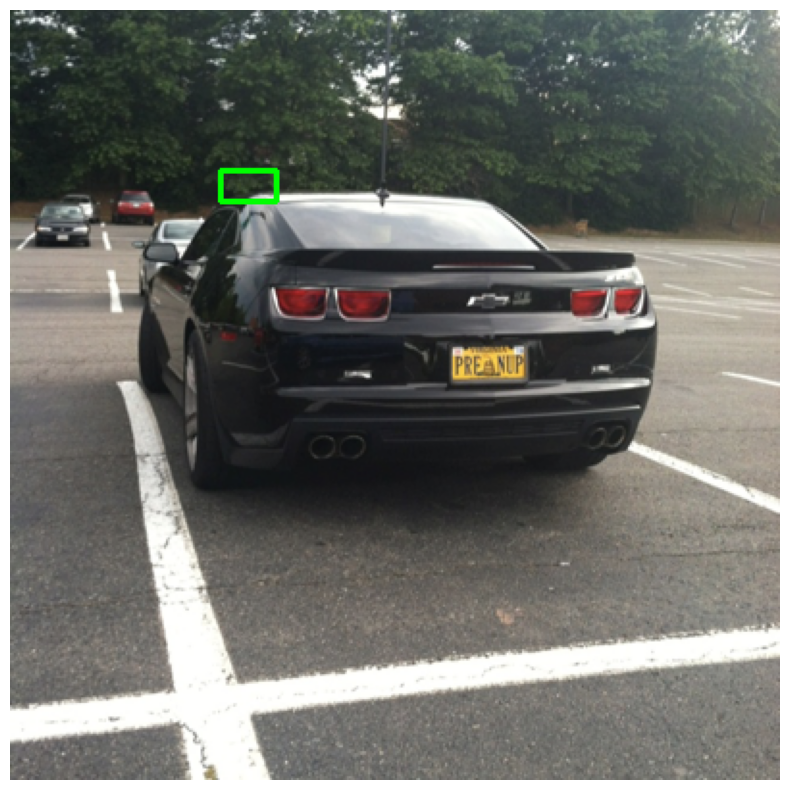

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf  # Assuming you're using TensorFlow for the model

# Load the image
x_test = cv2.imread("images/cars2.png")  # Ensure the correct path and file extension
if x_test is None:
    raise FileNotFoundError("The image file was not found. Check the file path and name.")

# Resize the image
img = cv2.resize(x_test, (224, 224))

# Preprocess the image for the model
img = img / 255.0  # Normalize to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make prediction using the model
# Ensure the model is loaded correctly
# model = ... (load your model here)

y_cnn = model.predict(img)

# Assuming y_cnn is of shape (1, 4) where it provides the coordinates
ny = y_cnn[0] * 224  # Rescale to the image size

# Draw the rectangle on the image
image = cv2.rectangle(x_test, (int(ny[0]), int(ny[1])), (int(ny[2]), int(ny[3])), (0, 255, 0), 2)

# Plot the image
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
plt.show()